In [1]:
import pandas as pd
import utils
import matplotlib.pyplot as plt
import random
import plotly.express as px

random.seed(9000)

plt.style.use("seaborn-ticks")
plt.rcParams["image.cmap"] = "Set1"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
%matplotlib inline

In [2]:
n_samples = 10000
n_replicates = 4

corr_replicating_df = pd.DataFrame()
group_by_feature = 'Metadata_broad_sample'
batch = "Scope1_PE_Bin1_Confocal_1Plane"

experiment_df = (
    pd.read_csv('../output/experiment-metadata.tsv', sep='\t')
    .query('Batch==@batch')
)
experiment_df.head()

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Binning,Number_of_channels,Anomaly
14,PE,Scope1_PE_Bin1_Confocal_1Plane,JUMP-MOA_compound_platemap,CP_Broad_Phenix_C_BIN1_1Plane_P1,1,5,none
15,PE,Scope1_PE_Bin1_Confocal_1Plane,JUMP-MOA_compound_platemap,CP_Broad_Phenix_C_BIN1_1Plane_P2,1,5,none
16,PE,Scope1_PE_Bin1_Confocal_1Plane,JUMP-MOA_compound_platemap,CP_Broad_Phenix_C_BIN1_1Plane_P3,1,5,none
17,PE,Scope1_PE_Bin1_Confocal_1Plane,JUMP-MOA_compound_platemap,CP_Broad_Phenix_C_BIN1_1Plane_P4,1,5,none


In [3]:
for plate in experiment_df.Assay_Plate_Barcode:
    plate_df = utils.load_data(batch, plate, "normalized_feature_select_negcon_batch.csv.gz")

    plate_df = utils.remove_negcon_empty_wells(plate_df)

    replicating_corr = list(utils.corr_between_replicates(plate_df, group_by_feature))
    null_replicating = list(utils.corr_between_non_replicates(plate_df, n_samples=n_samples, n_replicates=n_replicates, metadata_compound_name = group_by_feature))

    prop_95_replicating, value_95_replicating = utils.percent_score(null_replicating, replicating_corr, how='right')

    corr_replicating_df = corr_replicating_df.append({'Description':f'{plate}',
                                                      'Replicating':replicating_corr,
                                                      'Null_Replicating':null_replicating,
                                                      'Percent_Replicating':'%.1f'%prop_95_replicating,
                                                      'Value_95':value_95_replicating}, ignore_index=True)

In [4]:
print(corr_replicating_df[['Description', 'Percent_Replicating']].to_markdown(index=False))

| Description                      |   Percent_Replicating |
|:---------------------------------|----------------------:|
| CP_Broad_Phenix_C_BIN1_1Plane_P1 |                  51.1 |
| CP_Broad_Phenix_C_BIN1_1Plane_P2 |                  53.3 |
| CP_Broad_Phenix_C_BIN1_1Plane_P3 |                  51.1 |
| CP_Broad_Phenix_C_BIN1_1Plane_P4 |                  45.6 |


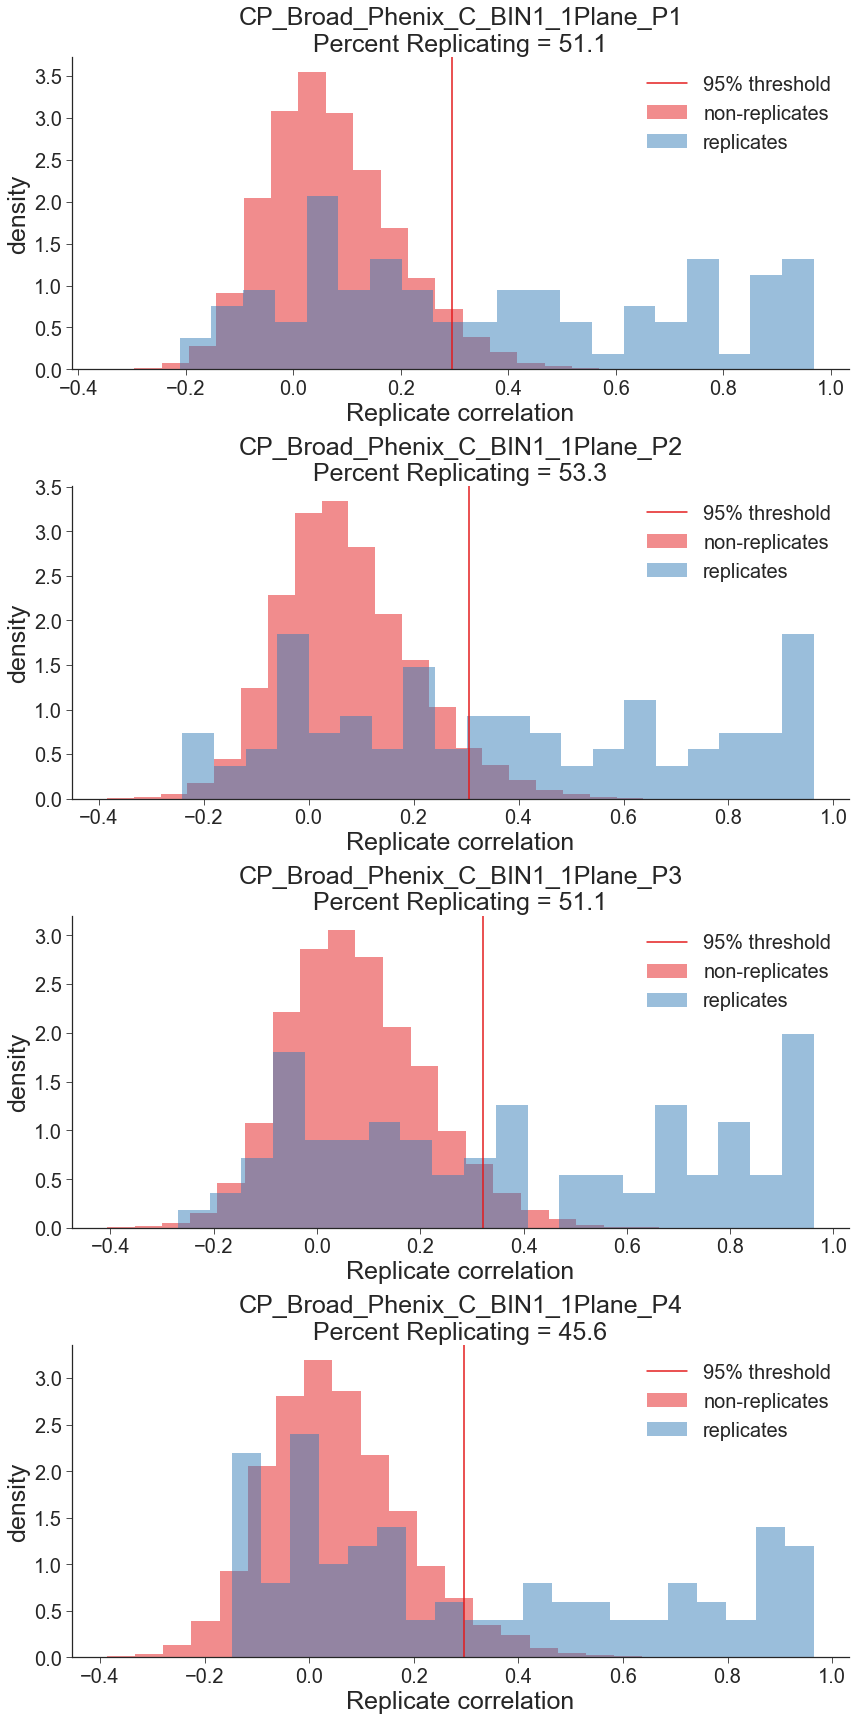

In [5]:
utils.distribution_plot(df=corr_replicating_df, output_file="1.percent_replicating.png", metric="Percent Replicating")